#vizualize 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import numpy as np
import tensorflow as tf
import cv2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/
cell_content.py:2:80: E501 line too long (84 > 79 characters)
cell_content.py:3:1: E265 block comment should start with '# '
cell_content.py:4:1: E402 module level import not at top of file
cell_content.py:5:1: E402 module level import not at top of file
cell_content.py:6:1: E402 module level import not at top of file
cell_content.py:7:1: E402 module level import not at top of file
cell_content.py:8:1: E402 module level import not at top of file
cell_content.py:9:1: E402 module level import not at top of file
cell_content.py:10:1: E402 module level import not at top of file
cell_content.py:11:1: E402 module level import not at top of file
cell_content.py:12:1: E402 module level import not at top of file



In [ ]:
path_dataset= r"/content/drive/MyDrive/BTL Của Huy (3)/2 Code/Hauu/data_new"
# data clean là thư mục , trong ddoscos nhiều thư mục con
dir = path_dataset
datadir = path_dataset

In [ ]:
a=[len(os.listdir(os.path.join(dir,os.listdir(dir)[x]))) for x in range(0,12)]
print(a)
sum(a)

[19, 20, 12, 23, 31, 26, 19, 14, 15, 15, 30, 22]


246

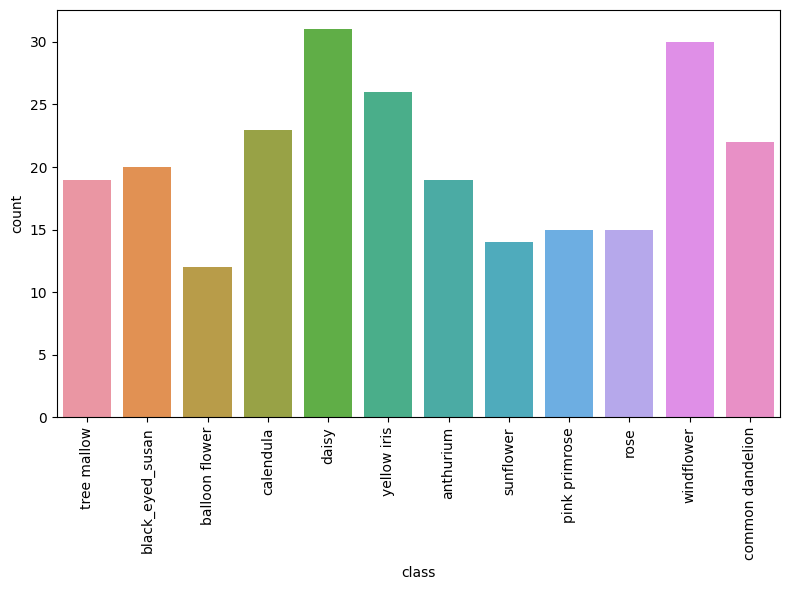

In [ ]:
## count number of images in each class for training data
# tạo DataFrame với 2 columns, 'class' and 'count'
DF = pd.DataFrame(columns=['class','count'])
# cột 'class' được phổ biến với 12 thư mục con đầu tiên trong một thư mục thư mục được chỉ định.
# os.listdir là một hàm Python trả về danh sách các tệp và thư mục con trong một thư mục được chỉ định.
DF['class']=pd.Series([os.listdir(dir)[x] for x in range(0,12)])
# cột 'count' được phổ biến với số lượng tệp trong mỗi thư mục con bằng cách sử dụng khả năng hiểu danh sách.
# os.path.join được sử dụng để tạo đường dẫn đầy đủ tới từng thư mục con
# len(os.listdir) trả về số lượng tệp trong thư mục con đó.
DF['count']=pd.Series([len(os.listdir(os.path.join(dir,os.listdir(dir)[x]))) for x in range(0,12)])
# tạo ra một hình mới với kích thước 8 inch x 6 inch.
plt.figure(figsize=(8,6))
# tạo biểu đồ thanh bằng cách sử dụng Seaborn với 'class' trên trục x và cột 'count' trên trục y
g=sns.barplot(x='class', y='count',data=DF)
# xoay nhãn trục x 90 độ để dễ đọc hơn.
g.set_xticklabels(g.get_xticklabels(), rotation=90)
# tự động điều chỉnh khoảng cách giữa các ô con để tránh văn bản hoặc nhãn chồng chéo.
plt.tight_layout()

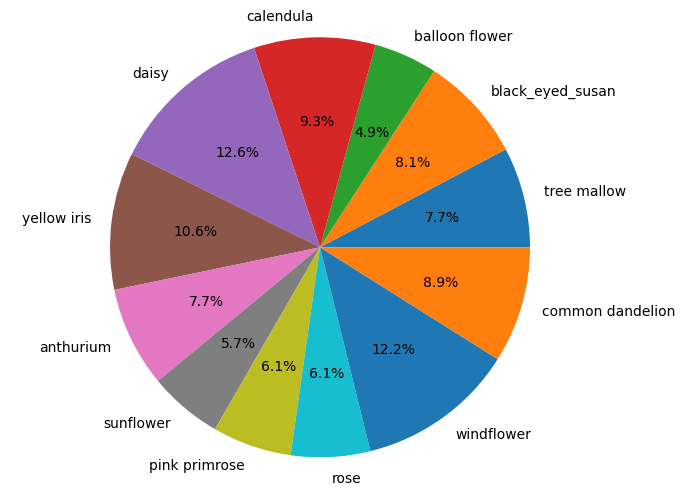

In [ ]:
## Đoạn mã này tạo ra một biểu đồ hình tròn đếm số lượng hình ảnh trong mỗi class cho dữ liệu đào tạo
plt.figure(figsize=(8,6))
plt.tight_layout()
# tạo biểu đồ hình tròn bằng Matplotlib với cột 'count' làm dữ liệu, cột 'class' làm nhãn 
# chuỗi định dạng %1.1f%% để hiển thị phần trăm của mỗi lát cắt.
plt.pie(DF['count'],
        labels=DF['class'],
        autopct='%1.1f%%')
# Định dạng biểu đồ hình tròn.
plt.axis('equal')
# đặt tiêu đề
# plt.title('Proportion of each observed category')
plt.show()

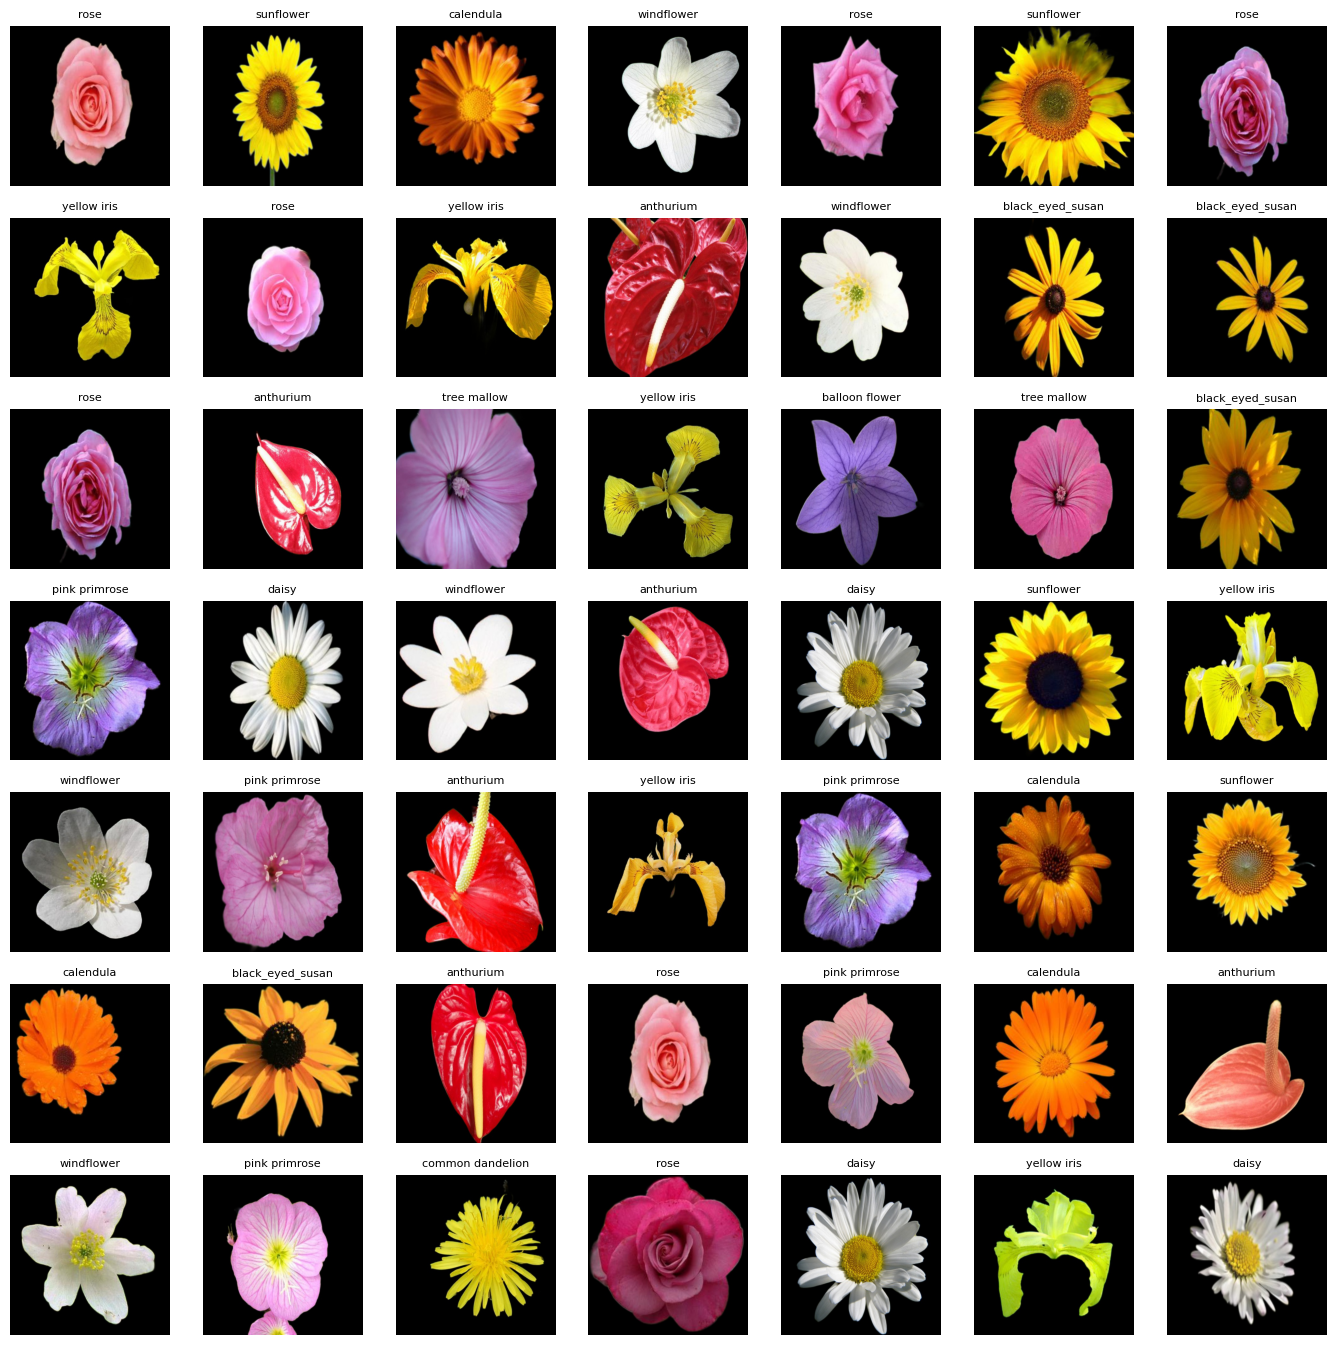

In [ ]:
W = 7
H = 7
# Tạo một đối tượng lưới hình ảnh với kích thước là W hàng và H cột
# với kích thước của lưới là (17,17) inches, và gán cho biến fig và axes.
fig, axes = plt.subplots(W, H, figsize = (17,17))

# Chuyển đổi đối tượng lưới hình ảnh từ dạng hai chiều sang một chiều duy nhất để dễ dàng truy cập và xử lý.
axes = axes.ravel() 
# Vòng lặp để duyệt qua từng phần tử trong lưới hình ảnh
for i in np.arange(0, W * H): 
    # Chọn ngẫu nhiên một nhãn từ danh sách các thư mục trong dir, đại diện cho tên lớp của hình ảnh.
    label = random.choice(os.listdir(dir))
    # Tạo đường dẫn đầy đủ đến thư mục của lớp hình ảnh đã chọn.
    class_dir = os.path.join(dir,label)
    # Chọn ngẫu nhiên một hình ảnh từ danh sách các tập tin trong thư mục lớp đã chọn.
    image = random.choice(os.listdir(class_dir))
    # Đọc hình ảnh từ đường dẫn đầy đủ của hình ảnh đã chọn.
    img = plt.imread(os.path.join(class_dir,image))
    # Hiển thị hình ảnh lên ô hình ảnh thứ i trong lưới.
    axes[i].imshow( img )
    # Đặt tiêu đề cho hình ảnh là nhãn của lớp hình ảnh đã chọn, với cỡ chữ là 8.
    axes[i].set_title(label, fontsize = 8)
    #  Tắt trục đồ thị để loại bỏ các dấu nhắc nhở trục trong hình ảnh.
    axes[i].axis('off')

# chia train test


In [ ]:
Categories = []
# Duyệt qua danh sách các thư mục (lớp) trong datadir (đường dẫn đến dữ liệu hình ảnh), và thêm tên của mỗi thư mục vào danh sách Categories.
for cat in os.listdir(datadir):
    Categories.append(cat)
Categories

['tree mallow',
 'black_eyed_susan',
 'balloon flower',
 'calendula',
 'daisy',
 'yellow iris',
 'anthurium',
 'sunflower',
 'pink primrose',
 'rose',
 'windflower',
 'common dandelion']

In [ ]:
dict_cat={}
count=0
for cat in Categories:

  dict_cat[str(count)]=str(cat)
  count+=1

In [ ]:
dict_cat

{'0': 'tree mallow',
 '1': 'black_eyed_susan',
 '2': 'balloon flower',
 '3': 'calendula',
 '4': 'daisy',
 '5': 'yellow iris',
 '6': 'anthurium',
 '7': 'sunflower',
 '8': 'pink primrose',
 '9': 'rose',
 '10': 'windflower',
 '11': 'common dandelion'}

# flower_data all RGB

In [ ]:
flower_data = []
# img_size = (496, 496)
count=0
for cat in Categories:
    path = os.path.join(datadir, cat)
    class_num = Categories.index(cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
        # img_array = cv2.resize(img_array, img_size)
        flower_data.append([ class_num,img_array])
        print(count, end=" ")
        count=count+1


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 

In [ ]:
# random.shuffle(flower_data)
# len(flower_data)

In [ ]:
X = []
y = []
for img, label in flower_data:
    y.append(img)
    X.append(label)
# print(X) ma trận
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]


In [ ]:
#save flower data npy.
np.save("flower_data.npy",flower_data)


/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


#hàm trích đặc trưng màu

In [ ]:
def rgb_to_hsv(pixel):
    r , g, b = pixel 
    r , g ,b = b / 255.0, g / 255.0, r / 255.0
    
    v = max(r,g,b)
    delta = v - min(r,g,b)
    
    if delta == 0:
        h = 0
        s = 0
    else:
        s = delta / v
        if r == v:
            h = (g - b) / delta
        elif g == v:
            h = 2 + (b - r) / delta
        else:
            h = 4 + (r - g) / delta
        h = (h / 6) % 1.0
        
    return [int(h*180), int(s*255), int(v*255)]

def covert_image_rgb_to_hsv(img):
  hsv_image=[]
  for i in img:
    hsv_image2=[]
    for j in i:
      new_color=rgb_to_hsv(j)
      hsv_image2.append((new_color))
    hsv_image.append(hsv_image2)
  hsv_image=np.array(hsv_image)
  return hsv_image

def my_calcHist(image, channels, histSize, ranges):
    # Khởi tạo histogram với tất cả giá trị bằng 0
    hist = np.zeros(histSize, dtype=np.int64)
    # Lặp qua tất cả các pixel trong ảnh
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Lấy giá trị của kênh màu được chỉ định
            bin_vals = [image[i, j, c] for c in channels]
            # Tính chỉ số của bin
            bin_idxs = [(bin_vals[c] - ranges[c][0]) * histSize[c] // (ranges[c][1] - ranges[c][0]) for c in range(len(channels))]
            # Tăng giá trị của bin tương ứng lên 1
            hist[tuple(bin_idxs)] += 1
    return hist

#trich xuat RGB

In [ ]:
from tqdm import tqdm
data_RGB =[]
for i in range(len(flower_data)):
  # Đọc ảnh và chuyển đổi sang không gian màu HSV
  img = flower_data[i][1]
  bins = [8, 8,8]
  ranges = [[0, 256], [0, 256], [0, 256]]
  # img_hsv=covert_image_rgb_to_hsv(img)
  hist_my = my_calcHist(img, [0, 1, 2], bins, ranges)
  embedding = hist_my.flatten()
  embedding[0]=0
  data_RGB.append([flower_data[i][0],embedding])
  print(i,end=' ')


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 

In [ ]:
embedding

array([    0,     0,     0,     0,     0,     0,     1,     0,     0,
           2,     1,     1,     7,     1,     2,     6,     3,     9,
           7,    18,    10,    15,    29,    32,    38,    28,   205,
          41,    66,  1379,    31,   107,  6368,  4245,   563, 17591,
           4,     0,     0,    18,     4,     1,    31,    14,     2,
          52,    47,    34,    70,   108,   191,   100,   333,   617,
          96,   576,   992,   199,   542,  1147,   225,   415,  1595,
         252,   424,  4144,   228,   690, 13834,  2740,  1132, 31971,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1,     0,     0,
           0,     0,     0,    10,     0,     0,    11,     0,     0,
           1,     0,     0,     0,     0,     0,  3223,     0,     0,
           0,     0,     0,     1,     0,     0,     2,     0,     0,
           2,     0,     0,     7,     0,     0,    19,     0,     0,
           0,     0,

In [ ]:
data_RGB

[[0,
  array([    0,   282,     0,     0,     0,     0,     0,     0,    10,
           105,     0,     0,     0,     0,     0,     0,     0,     3,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,   387,   910,   182,     1,     0,     0,     0,     0,
           107,   887,   107,     0,     0,     0,     0,     0,     0,
            39,    20,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,  

In [ ]:
np.save("RGB.npy",data_RGB)

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


#trich xuat hsv

In [ ]:
data_HSV=[]
for i in range(len(flower_data)) :
  # Đọc ảnh và chuyển đổi sang không gian màu HSV
  img = flower_data[i][1]
  bins = [8,12,3]
  ranges = [[0, 180], [0, 256], [0, 256]]
  img_hsv=covert_image_rgb_to_hsv(img)
  hist_my = my_calcHist(img_hsv, [0, 1, 2], bins, ranges)
  # print(hist_my.shape)
  embedding = hist_my.flatten()
  embedding[0]=0
  data_HSV.append([flower_data[i][0],embedding])
  print(i,end=' ')


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 

In [ ]:
np.save("HSV.npy", data_HSV)

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


#ham trich xuat dac trung hinh dang HOG

In [ ]:
from skimage import exposure
from skimage import feature
import cv2
def convert_image_rgb_to_gray(img_rgb, resize="no"):
  h, w, _ = img_rgb.shape
  # Create a new grayscale image with the same height and width as the RGB image
  img_gray = np.zeros((h, w), dtype=np.uint32)

  # Convert each pixel from RGB to grayscale using the formula Y = 0.299R + 0.587G + 0.114B
  for i in range(h):
      for j in range(w):
          r, g, b = img_rgb[i, j]
          gray_value = int(0.299*r + 0.587*g + 0.114*b)
          img_gray[i, j] = gray_value
  # print(gray_image.shape())
  if resize!="no":
     img_gray = cv2.resize(src=img_gray, dsize=(496, 496))
  return np.array(img_gray)
def hog_feature(gray_img):# default gray_image
  # 1. Khai báo các tham số
  (hog_feats, hogImage) = feature.hog(gray_img, orientations=9, pixels_per_cell=(8 , 8),
    cells_per_block=(2,2), transform_sqrt=True, block_norm="L2",
    visualize=True)
  return hog_feats


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
img="/content/drive/MyDrive/BTL Của Huy (3)/2 Code/Hauu/data_new/black_eyed_susan/1066371052_e91a857eb0_c.jpg"

img=cv2.imread(img)

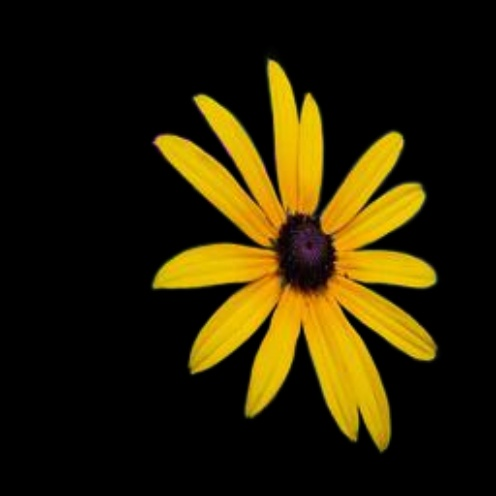

In [ ]:
cv2_imshow(img)

#trich xuat HOG

In [ ]:
data_hog=[]
for i in range(len(flower_data)) :
  # Đọc ảnh và chuyển đổi sang không gian màu HSV

  # img_hsv=covert_image_rgb_to_hsv(img)
  # hist_my = my_calcHist(img_hsv, [0, 1, 2], bins, ranges)
  # print(hist_my.shape)
  img_gray=convert_image_rgb_to_gray(flower_data[i][1])
  embedding=hog_feature(img_gray)
  embedding = embedding.flatten()
  # embedding[0]=0
  data_hog.append([flower_data[i][0],embedding])
  print(i,end=' ')


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 

In [ ]:
len(data_hog[0][1])

133956

In [ ]:
np.save("hog.npy",data_hog)

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
data_file_hsv=np.load("/content/drive/MyDrive/BTL Của Huy (3)/2 Code/Hauu/HSV.npy",allow_pickle=True)
data_file_hog=np.load("/content/drive/MyDrive/BTL Của Huy (3)/2 Code/Hauu/HOG.npy",allow_pickle=True)
data_file_rgb=np.load("/content/drive/MyDrive/BTL Của Huy (3)/2 Code/Hauu/RGB.npy",allow_pickle=True)

In [ ]:
len(data_file_hog[:,1])

246

# trich xuat HSV+HOG

In [ ]:
array_concat_hog_hsv=[]
for i in range(len(data_file_hog)):
  concat_in_value=np.concatenate((data_file_hsv[:,1][i] ,data_file_hog[:,1][i]))
  array_concat_hog_hsv.append([data_file_hog[:,0][i],concat_in_value])

In [ ]:
len(data_file_hog[0][1])

133956

In [ ]:
len(array_concat_hog_hsv[0][1])

134244

In [ ]:
array_concat_hog_hsv[0]

[0, array([0., 0., 0., ..., 0., 0., 0.])]

In [ ]:
np.save("concat_hog_hsv.npy", array_concat_hog_hsv)

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


#trich xuat RGB + HOG

In [ ]:
array_concat_hog_rgb=[]
for i in range(len(data_file_hog)):
  concat_in_value=np.concatenate((data_file_rgb[:,1][i] ,data_file_hog[:,1][i]))
  array_concat_hog_rgb.append([data_file_hog[:,0][i],concat_in_value])

In [ ]:
len(data_file_rgb[0][1])

512

In [ ]:
len(array_concat_hog_rgb[0][1])

134468

In [ ]:
np.save("concat_hog_rgb.npy",array_concat_hog_rgb)

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
